In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

## Load Dataset

In [2]:
df = pd.read_csv("../DataSets/bitcoin_prices.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df_chart = df.copy()
df

,timestamp,-1min,-2min,-3min,-4min,-5min,-6min,-7min,MA7,price
0,2023-04-06 23:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28055.71
1,2023-04-06 23:14:00,28055.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28057.91
2,2023-04-06 23:15:00,28057.91,28055.71,NaN,NaN,NaN,NaN,NaN,NaN,28059.26
3,2023-04-06 23:16:00,28059.26,28057.91,28055.71,NaN,NaN,NaN,NaN,NaN,28058.97
4,2023-04-06 23:17:00,28058.97,28059.26,28057.91,28055.71,NaN,NaN,NaN,NaN,28054.40
...,...,...,...,...,...,...,...,...,...,...
1436,2023-04-07 23:09:00,27930.90,27953.80,27954.24,27977.55,27953.07,27956.37,27955.29,27954.460000,27929.65
1437,2023-04-07 23:10:00,27929.65,27930.90,27953.80,27954.24,27977.55,27953.07,27956.37,27950.797143,27912.30
1438,2023-04-07 23:11:00,27912.30,27929.65,27930.90,27953.80,27954.24,27977.55,27953.07,27944.501429,27928.56
1439,2023-04-07 23:12:00,27928.56,27912.30,27929.65,27930.90,27953.80,27954.24,27977.55,27941.000000,27918.67


## Dataset Summary

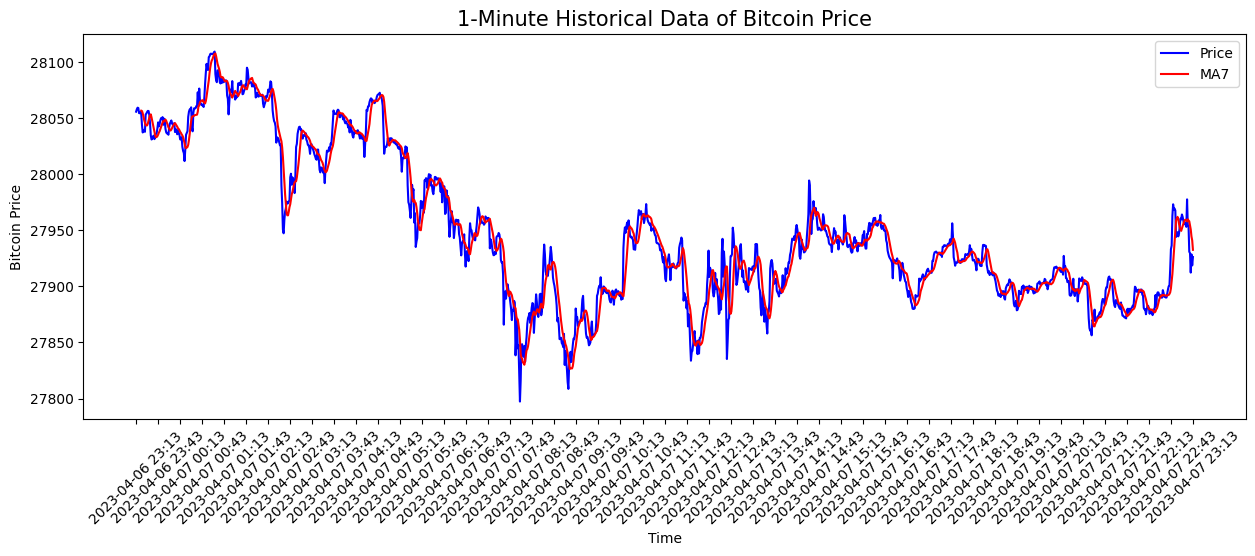

In [3]:
df_chart['timestamp'] = pd.to_datetime(df_chart['timestamp'])
df_chart.set_index('timestamp', inplace=True)

plt.figure(figsize=(15,5))
plt.plot(df_chart.index, df_chart['price'], color='blue', label='Price')
plt.plot(df_chart.index, df_chart['MA7'], color='red', label='MA7')  # Add the moving average line
plt.title('1-Minute Historical Data of Bitcoin Price', fontsize=15)
plt.ylabel('Bitcoin Price')
plt.xlabel('Time')
plt.legend()

tick_values = pd.date_range(start=df_chart.index[0], end=df_chart.index[-1], freq='30T')
tick_labels = [date.strftime('%Y-%m-%d %H:%M') for date in tick_values]
plt.xticks(tick_values, tick_labels, rotation=45)

plt.show()

## Set Features and Target

In [4]:
# drop the timestamp column, NaN rows
df = df.drop(df.index[:7])
df.drop(['timestamp'], axis=1, inplace=True)

# split the data into features (X) and target (y)
X = df.drop(['price'], axis=1)

y = df['price']

In [5]:
X

,-1min,-2min,-3min,-4min,-5min,-6min,-7min,MA7
7,28055.62,28054.35,28054.40,28058.97,28059.26,28057.91,28055.71,28056.602857
8,28053.60,28055.62,28054.35,28054.40,28058.97,28059.26,28057.91,28056.301429
9,28043.61,28053.60,28055.62,28054.35,28054.40,28058.97,28059.26,28054.258571
10,28037.15,28043.61,28053.60,28055.62,28054.35,28054.40,28058.97,28051.100000
11,28039.49,28037.15,28043.61,28053.60,28055.62,28054.35,28054.40,28048.317143
...,...,...,...,...,...,...,...,...
1436,27930.90,27953.80,27954.24,27977.55,27953.07,27956.37,27955.29,27954.460000
1437,27929.65,27930.90,27953.80,27954.24,27977.55,27953.07,27956.37,27950.797143
1438,27912.30,27929.65,27930.90,27953.80,27954.24,27977.55,27953.07,27944.501429
1439,27928.56,27912.30,27929.65,27930.90,27953.80,27954.24,27977.55,27941.000000


In [6]:
y

7       28053.60
8       28043.61
9       28037.15
10      28039.49
11      28039.18
          ...   
1436    27929.65
1437    27912.30
1438    27928.56
1439    27918.67
1440    27926.14
Name: price, Length: 1434, dtype: float64

## Split, Scale and Reshape Data

In [7]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Sequential model

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## Summary

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 8, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_4 (LSTM)               (None, 50)               

## Train

In [11]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


2023-04-07 22:18:01.967262: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 7s 82ms/step - loss: 780935936.0000 - accuracy: 0.0000e+00 - val_loss: 780594624.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 1s 32ms/step - loss: 780513216.0000 - accuracy: 0.0000e+00 - val_loss: 780419136.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 1s 31ms/step - loss: 780385152.0000 - accuracy: 0.0000e+00 - val_loss: 780307328.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 1s 31ms/step - loss: 780279872.0000 - accuracy: 0.0000e+00 - val_loss: 780203904.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
32/32 [==============================] - 1s 31ms/step - loss: 780178752.0000 - accuracy: 0.0000e+00 - val_loss: 780101184.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
32/32 [==============================] - 1s 31ms/step - loss: 780077952.0000 - accuracy: 0.0000e+00 - val_loss: 780000576.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
32/32 [===

32/32 [==============================] - 1s 32ms/step - loss: 776055680.0000 - accuracy: 0.0000e+00 - val_loss: 775925056.0000 - val_accuracy: 0.0000e+00


In [ ]:
# model.save('model_001.h5')
# loaded_model = keras.models.load_model('model_001.h5')

## Evaluate

In [12]:
y_pred = model.predict(X_test)

14/14 [==============================] - 1s 18ms/step


In [13]:
error_rates = (y_test.values.reshape(-1, 1) - y_pred) / y_test.values.reshape(-1, 1) * 100
average_error_rate = np.sum(error_rates)/len(error_rates)
plt.plot(error_rates)
plt.text(120,-55, average_error_rate, fontsize = 22, bbox = dict(facecolor = 'red', alpha = 0.3))
plt.title('Error Rate')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

ValueError: Image size of 602x14656794 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

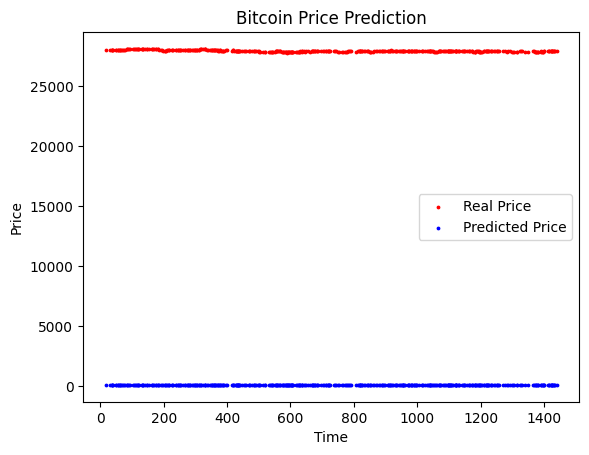

In [14]:
plt.scatter(y_test.index, y_test, color='red', label='Real Price', s=3)
plt.scatter(y_test.index, y_pred, color='blue', label='Predicted Price', s=3)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
y_pred.shape

(431, 1)

In [20]:
y_test.shape

(431,)